# Activity 9

In [1]:
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
response = requests.get('https://www.gutenberg.org/browse/scores/top')

In [4]:
# Function to check status of response
def status_check(resp):
    if resp.status_code == 200:
        print("Success!")
    else:
        print("Failed!")
    return resp.status_code

In [5]:
status_check(response)

Success!


200

In [6]:
# Decode the response and pass on to `BeautifulSoup` for HTML parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [7]:
# Find all the href tags and store them in the list
url_list = []
for url in soup.find_all('a'):
    url_list.append(url.get('href'))

# print first 30 elements
url_list[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [8]:
# Regular expression to find the numeric digits in the link (href) string
books_list = []
for index in range(19,119):
    url = url_list[index].strip()
    num = re.findall('[0-9]+', url) 
    if len(num) == 1:
        books_list.append(int(num[0]))

print("File numbers for the top 100 ebooks on Gutenberg: \n")
print(books_list)

File numbers for the top 100 ebooks on Gutenberg: 

[1, 1, 7, 7, 30, 30, 1342, 1661, 11, 105, 84, 2701, 345, 2591, 33283, 174, 98, 1184, 4300, 2600, 5200, 1400, 6130, 1952, 64317, 2554, 68613, 1080, 1260, 30254, 68609, 1232, 68611, 58585, 45, 68610, 120, 844, 1399, 43, 76, 28054, 74, 514, 27827, 68604, 5740, 158, 768, 32449, 28026, 2542, 55, 4980, 67098, 219, 244, 16, 4363, 161, 205, 996, 2680, 1727, 10, 5827, 135, 8492, 1497, 35, 766, 2814, 36, 1998, 43453, 236, 25344, 2852, 68605, 730, 68612, 863, 27107, 42108, 3600, 46, 2848, 31284, 41, 3296, 3206, 902]


In [9]:
soup.text[:2000]

"\n\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright Procedures\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not co

In [10]:
# Create a starting index. It should point at the text _"Top 100 Ebooks yesterday"_. Hint: Use `splitlines()` method of the `soup.text`. It splits the lines of the text of the `soup` object.
ebooks_list = []

index_start = soup.text.splitlines().index('Top 100 EBooks yesterday')

for index in range(100):
    ebooks_list.append(soup.text.splitlines()[index_start+2+index])

ebooks_list

['Top 100 EBooks last 7 days',
 'Top 100 Authors last 7 days',
 'Top 100 EBooks last 30 days',
 'Top 100 Authors last 30 days',
 '',
 '',
 'Top 100 EBooks yesterday',
 '',
 'Pride and Prejudice by Jane Austen (1870)',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle (1014)',
 "Alice's Adventures in Wonderland by Lewis Carroll (786)",
 'Persuasion by Jane Austen (675)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (620)',
 'Moby Dick; Or, The Whale by Herman Melville (594)',
 'Dracula by Bram Stoker (553)',
 "Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm (510)",
 'Calculus Made Easy by Silvanus P.  Thompson (506)',
 'The Picture of Dorian Gray by Oscar Wilde (491)',
 'A Tale of Two Cities by Charles Dickens (489)',
 'The Count of Monte Cristo, Illustrated by Alexandre Dumas (486)',
 'Ulysses by James Joyce (460)',
 'War and Peace by graf Leo Tolstoy (413)',
 'Metamorphosis by Franz Kafka (398)',
 'Great Expectations by Charles Dickens (366)',


 # Activity 10

In [11]:
from urllib import request, parse, error
import os
import json

In [12]:
with open('secrets.json') as f:
    keys = json.load(f)
    api_key = keys['api_key']

In [13]:
url = f"http://www.omdbapi.com/?"
api_str = f"apikey={api_key}"

In [14]:
def print_json(json_data):
    keys_list = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']

    for key in keys_list:
        if key in list(json_data.keys()):
            print(f"{key}: {json_data[key]}")

In [15]:
def save_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_ext = poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = request.urlopen(poster_url).read()
        
    location = f"{os.getcwd()}\\Posters\\"
    
    # Creates new directory if the directory does not exist
    if not os.path.isdir(location):
        os.mkdir(location)
    
    filename = f'{location}{str(title)}.{poster_file_ext}' 
    file = open(filename,'wb')
    file.write(poster_data)
    file.close()

In [16]:
def search_movie(title):
    try:
        search_url = f"{url}"
        print(f'Retrieving the data of "{title}" now... ')
        print(search_url)
        resp = requests.get(url, params={'t': str(title), 'apikey': api_key})
        json_data = resp.json()
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print(f"Error: {json_data['Error']}")
    
    except error.URLError as e:
        print(f"ERROR: {e.reason}")

In [17]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,141,554
imdbID: tt0120338


In [18]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?
Error: Movie not found!


# Twitter API 

In [19]:
import twitter

In [20]:
api_key = 'xxxxxxxxxxxxxxxxx'
api_secret = 'xxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxx'

In [21]:
api = twitter.Api(consumer_key=api_key,
                  consumer_secret=api_secret,
                  access_token_key=access_token,
                  access_token_secret=access_secret)

In [22]:
api.GetSearch(term='Bellevue University', count=10)

[Status(ID=1552761990329683968, ScreenName=SheRidesABike, Created=Thu Jul 28 21:04:42 +0000 2022, Text='RT @BoPOP_WA: #WeTakeTransit:\n🚍 522 from Roosevelt via Lk City\n🚍 372 from University of WA\n🚍 535 from Bellevue\n🚍 105 from SW EVT &amp; Mill Crk…'),
 Status(ID=1552761874835337216, ScreenName=BoPOP_WA, Created=Thu Jul 28 21:04:14 +0000 2022, Text='#WeTakeTransit:\n🚍 522 from Roosevelt via Lk City\n🚍 372 from University of WA\n🚍 535 from Bellevue\n🚍 105 from SW EVT… https://t.co/lG5B2DaJXE'),
 Status(ID=1552693656125116417, ScreenName=BellevueU, Created=Thu Jul 28 16:33:09 +0000 2022, Text='A bachelor’s and two master’s degrees from Bellevue University — Jeremy is crushing it! #goals https://t.co/AmB3Ba9wQu'),
 Status(ID=1552631282495922176, ScreenName=kcmetrocanceled, Created=Thu Jul 28 12:25:18 +0000 2022, Text='Route 271 to University District Bellevue\n(* = canceled until further notice)\nDeparting Eastgate Park &amp; Ride - Bay… https://t.co/mIRB5dJZlc'),
 Status(ID=1552535212

In [23]:
api.GetSearch(term='Omaha', count=10)

[Status(ID=1552336389911494656, ScreenName=JomboyMedia, Created=Wed Jul 27 16:53:31 +0000 2022, Text='A pair of Omaha Storm Chasers hit home runs off of Jacob deGrom in the same inning! https://t.co/GDdvidZAzS'),
 Status(ID=1552744471225417731, ScreenName=rodger, Created=Thu Jul 28 19:55:05 +0000 2022, Text='so Better Call Saul does one episode in Omaha and has an extended Nebraska football plotline... but 11 seasons of B… https://t.co/gq0IItcmvP'),
 Status(ID=1552300574791565312, ScreenName=DickieV, Created=Wed Jul 27 14:31:12 +0000 2022, Text='The @CycloneMBB  fans are celebrating big time as they get a commitment from the highest rated PTPER in the history… https://t.co/NB0PLXTjOD'),
 Status(ID=1552879564774248448, ScreenName=Reed_B00ks, Created=Fri Jul 29 04:51:54 +0000 2022, Text='RT @WHO13news: Omaha Biliew discusses commitment to Cyclones https://t.co/5GjqvswLy0'),
 Status(ID=1552879397677383681, ScreenName=SPPokr, Created=Fri Jul 29 04:51:14 +0000 2022, Text='Congratulations to

# Visualizations

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# df = pd.read_csv('genres_v2.csv', low_memory=False)
df = pd.read_csv('cancer.csv')

### Scatter Plot

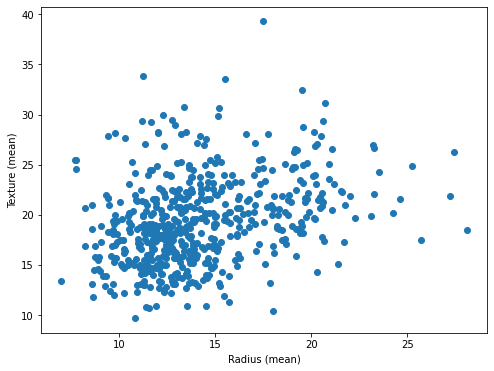

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Radius (mean)'], df['Texture (mean)'])
plt.xlabel('Radius (mean)')
plt.ylabel('Texture (mean)')
plt.show()

### Histogram

<AxesSubplot:xlabel='Area (mean)', ylabel='Count'>

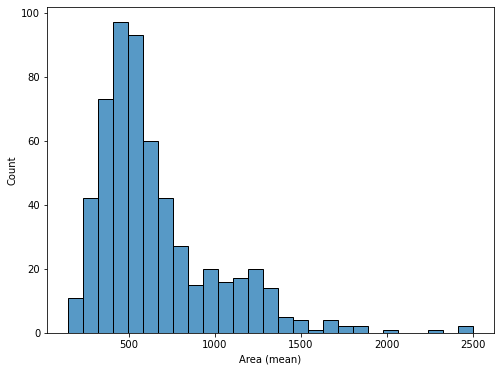

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(df['Area (mean)'])

### Density pLot

<AxesSubplot:xlabel='Perimeter (mean)', ylabel='Density'>

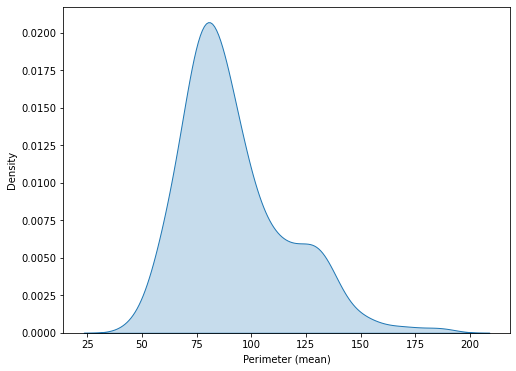

In [28]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df['Perimeter (mean)'], shade=True)

### Line Plot

<AxesSubplot:xlabel='Perimeter (mean)', ylabel='Area (mean)'>

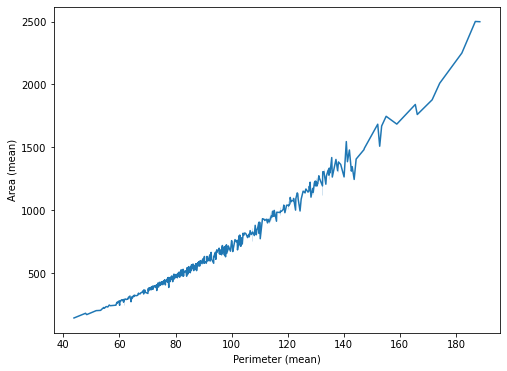

In [29]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Perimeter (mean)", y="Area (mean)", data=df)